In [1]:
#Yash Gharate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
A= pd.read_csv('airquality1.csv')

In [2]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high


In [3]:
#Cleaning Data
#Dropping columns
A = A.drop(['Unnamed: 0'], axis=1)

In [4]:
#Checking null values in dataset
A.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
humidity     4
dtype: int64

In [5]:
#taking mean of ozone solar and humidity
meanOzone = A[['Ozone']].mean()
meanSolar = A[['Solar.R']].mean()
meanhumidity = A['humidity'].mode()[0]

In [6]:
#Filling null values
A[["Ozone"]]=A[["Ozone"]].fillna(value=meanOzone)
A[["Solar.R"]]=A[["Solar.R"]].fillna(value=meanSolar)
A[["humidity"]]=A[["humidity"]].fillna(value=meanhumidity)

In [7]:
A.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
humidity    0
dtype: int64

In [8]:
#Data Integration
subset1 = A.loc[0:5,['Ozone']]
subset2 = A.loc[0:10,['humidity','Ozone']]

In [9]:
subset1.shape

(6, 1)

In [10]:
subset2.shape

(11, 2)

In [11]:
merge= subset2.merge(subset1)
merge.shape

(7, 2)

In [12]:
new_humidity=pd.get_dummies(A['humidity'])
new=pd.concat([A,new_humidity],axis=1)
new

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity,high,low,medium
0,41.00000,190.000000,7.4,67,5,1,high,True,False,False
1,36.00000,118.000000,8.0,72,5,2,high,True,False,False
2,12.00000,149.000000,12.6,74,5,3,high,True,False,False
3,18.00000,313.000000,11.5,62,5,4,high,True,False,False
4,42.12931,185.931507,14.3,56,5,5,high,True,False,False
...,...,...,...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,high,True,False,False
149,42.12931,145.000000,13.2,77,9,27,high,True,False,False
150,14.00000,191.000000,14.3,75,9,28,high,True,False,False
151,18.00000,131.000000,8.0,76,9,29,high,True,False,False


In [13]:
X = A[['Ozone']]
Y = A[['Temp']]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
X_train.shape

(122, 1)

In [16]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,Y_train)
predictions=reg.predict(X_test)
predictions

array([[ 73.5620416 ],
       [ 84.68798785],
       [ 80.19481725],
       [ 78.08287951],
       [ 73.98996261],
       [ 72.49223908],
       [ 70.56659453],
       [ 78.08287951],
       [ 78.08287951],
       [105.01423581],
       [ 78.08287951],
       [ 70.99451554],
       [ 78.08287951],
       [ 73.98996261],
       [ 78.08287951],
       [ 73.98996261],
       [ 78.08287951],
       [ 72.06431807],
       [ 78.69709372],
       [ 78.08287951],
       [ 87.25551391],
       [ 73.5620416 ],
       [ 71.85035756],
       [ 69.2828315 ],
       [ 78.08287951],
       [ 72.49223908],
       [ 72.06431807],
       [ 84.26006684],
       [ 78.08287951],
       [ 85.75779038],
       [ 78.08287951]])

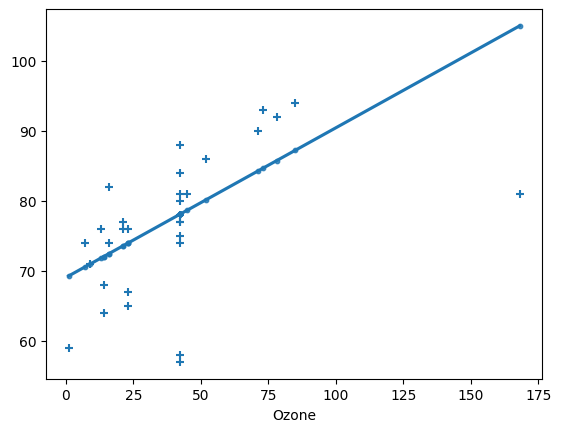

In [17]:
sbn.regplot(x=X_test['Ozone'],y=predictions,scatter_kws={'s':10})
plt.scatter(X_test['Ozone'],Y_test, marker='+')